# Mushrooms

In this notebook I will use my decision tree classifier to determine if a mushroom is edible or not. I will use the dataset available from the UCL machine learning repository, also downloadable here https://www.kaggle.com/datasets/uciml/mushroom-classification?resource=download .

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from Decision_tree_classifier import *
from Useful_tools import *
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv("mushrooms.csv")


In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
# Lets move the class to the end of the dataframe rather than the start

class_col = df.pop('class')

df.insert(df.shape[1], "class", class_col)

In [5]:
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises                   8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                8124 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

In [7]:
df.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,9,9,1,4,3,5,9,6,7,2
top,x,y,n,f,n,f,c,b,b,t,...,w,w,p,w,o,p,w,v,d,e
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4464,4384,8124,7924,7488,3968,2388,4040,3148,4208


<AxesSubplot: >

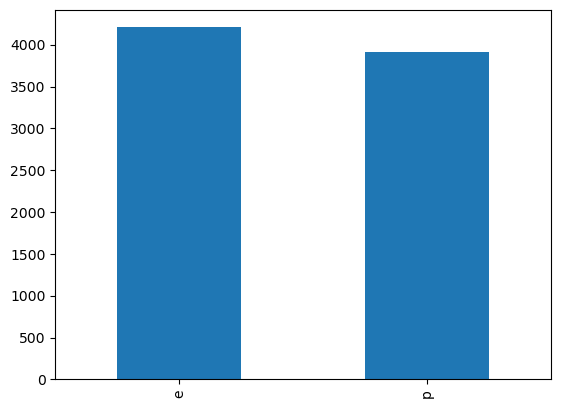

In [8]:
df['class'].value_counts().plot(kind='bar')

In [9]:
def labelencoder(data):
    col = df.columns[0]
    dict = {}
    list = [x for x in data.unique()]
    for enum in range(len(list)):
        dict[list[enum]] = enum
    for label in list:
        data = data.apply(lambda x: dict[label] if x == label else x)
    return data

In [10]:
df["class"] = labelencoder(df["class"])
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,0
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,1
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,1
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,0
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,1


In [11]:
for column in df.columns:
    df[column] = labelencoder(df[column])

In [12]:
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,1,1,1
2,1,0,2,0,2,0,0,1,1,0,...,0,0,0,0,0,0,1,1,2,1
3,0,1,2,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3,1,3,0,1,1,0,1,...,0,0,0,0,0,1,1,2,1,1


In [13]:

Y = df['class'].values.reshape(-1,1)

# Make a copy so that we can still refer to the whole dataframe later
df_1 = df.copy(deep=True)
X = df_1.drop('class', axis='columns').values

# Create a split to have a training and evaluation set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.1, random_state=6)




In [14]:
classifier = Tree_classifier(min_samples_split=3, max_depth=30)
classifier.fit(X_train,Y_train)
classifier.print_tree()

X_4 <= 3 ? 0.20787802538353783
 left:X_9 <= 0 ? 0.5762240690597191
  left:X_5 <= 0 ? 0.10010785754072415
    left:X_4 <= 0 ? 0.10017399822980677
        left:0
        right:X_20 <= 1 ? 0.5822571866808655
                left:1
                right:X_19 <= 3 ? 0.395333624877214
                                left:1
                                right:X_21 <= 3 ? 0.15873790411032418
                                                                left:X_11 <= 2 ? 0.12888888888888883
                                                                                                                                left:0
                                                                                                                                right:1
                                                                right:X_6 <= 0 ? 0.7905205066074572
                                                                                                                                left:1
    

Now to test the accuracy of the tree, you might assume that this number of 100% accuracy is dubious, however I think it is correct when I increase the size of the test set to over 50% it does begin to fall, however in general it is very good, given this many datapoints a quite a deep tree it appears to be quite accurate.

In [15]:
Y_pred = classifier.predict(X_test)
print(accuracy_score(Y_pred,Y_test))

1.0
